# Monte Carlo Simulation of Netflix Stock Prices using Stochastic GBM equation

##### Ref: "Stock Price Predictions using a Geometric Brownian Motion" Paper by Joel Liden


## Objective

To determine the probability of interval of stock prices in a future time period by implementing Monte Carlo Simulation based on Geometric Brownian Motion Stochastic Equation



## Importing Required Libraries

In [1]:
# imports datetime for picking beginning and end dates for the analysis
import datetime
# imports yahoo finance for getting historical stock prices
import yfinance as yf
# imports pandas for dataframe manipulation
import pandas as pd
# imports numpy
import numpy as np
# for data visualization
import matplotlib as mpl
# for changing the plot size in the Jupyter Notebook output
%matplotlib inline
# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (12,8)
# for shorter lines with plotting
from matplotlib import pyplot as plt
# to hide warning messages
import warnings

# to suppress warnings
warnings.filterwarnings('ignore')

## Loading Netflix Stock Close Price Data from past 7 years

In [2]:
# sets the sample period as 7 years back from 09/12/2019
end = datetime.datetime(2019, 9, 12)
start = end - datetime.timedelta(days = 7*365)

# gets the closing price fo Netflix for the past 7 years
stock = yf.Ticker('NFLX')
print(stock.info['longBusinessSummary'])

Netflix, Inc. provides subscription streaming entertainment service. It offers TV series, documentaries, and feature films across various genres and languages. The company provides members the ability to receive streaming content through a host of Internet-connected screens, including TVs, digital video players, television set-top boxes, and mobile devices. It also provides DVDs-by-mail membership services. The company has approximately 167 million paid members in 190 countries. Netflix, Inc. was founded in 1997 and is headquartered in Los Gatos, California.


In [3]:
stock_data = pd.DataFrame(stock.history(start = start, end = end)['Close'])
stock_data = stock_data.rename(str.lower, axis = 'columns')

## Calculating Logarithmic Returns

In [4]:
log_returns = np.log(1 + stock_data.pct_change())

In [5]:
log_returns = log_returns.dropna()
log_returns.head()

,close
Date,
2012-09-13,0.014581
2012-09-14,0.042509
2012-09-17,-0.059541
2012-09-18,-0.017327
2012-09-19,0.017327


## Plot of Daily Closing Stock Prices

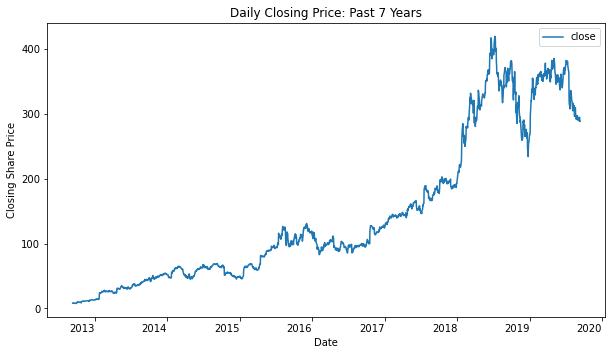

In [6]:
# plots the my_stock weekly closing price over the past 5 years
stock_data.plot(figsize=(10,6))
plt.title('Daily Closing Price: Past 7 Years')
plt.xlabel('Date')
plt.ylabel('Closing Share Price')
plt.xticks(rotation = 0)
plt.show()

## Plot of Log Returns

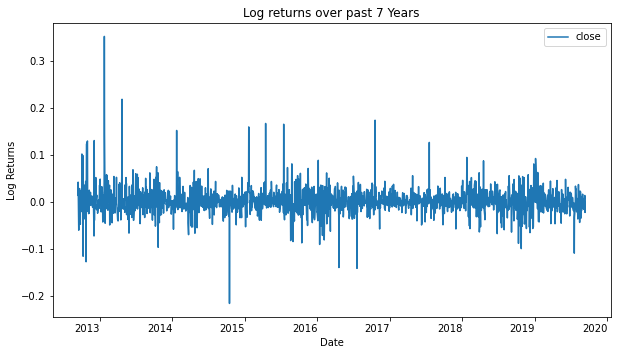

In [7]:
# plots the my_stock weekly closing price over the past 5 years
log_returns.plot(figsize=(10,6))
plt.title('Log returns over past 7 Years')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.xticks(rotation = 0)
plt.show()

## Plot of ACF and Partial ACF of Log returns
The plot of ACF (Autocoorelation Function) and Partial ACF is centred around mean and seems fairly random which can be modeled using PDF (Probability Distribution Functions).

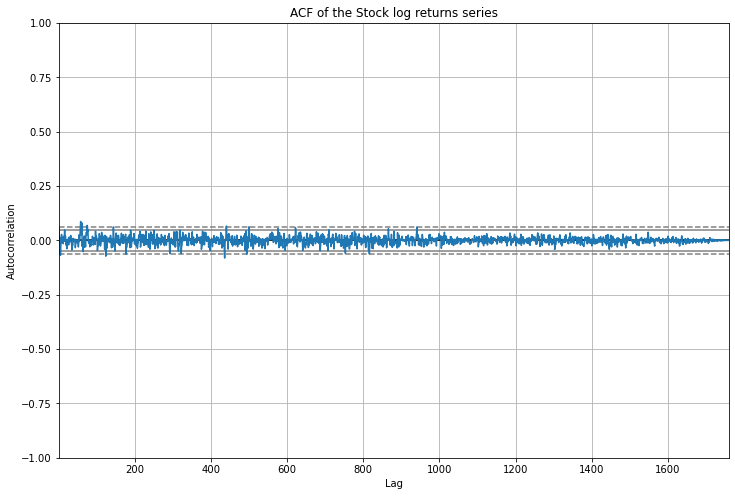

In [8]:
# to suppress warnings
warnings.filterwarnings('ignore')

# sets the plot size to 12x8
mpl.rcParams['figure.figsize'] = (12,8)

# plots the ACF for the entire train period
pd.plotting.autocorrelation_plot(log_returns.close)
plt.title('ACF of the Stock log returns series')
plt.show()

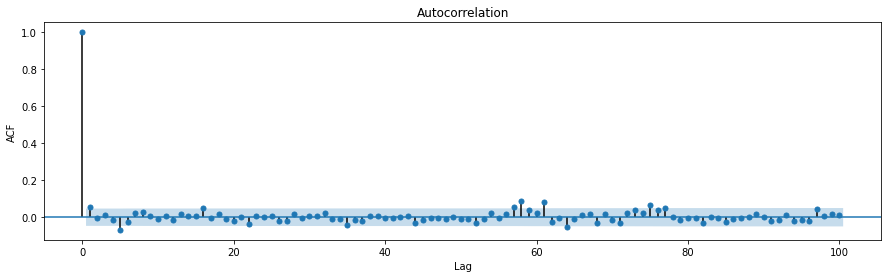

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

mpl.rcParams['figure.figsize'] = (15,4)
plot_acf(log_returns.close, lags=100)
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.show()

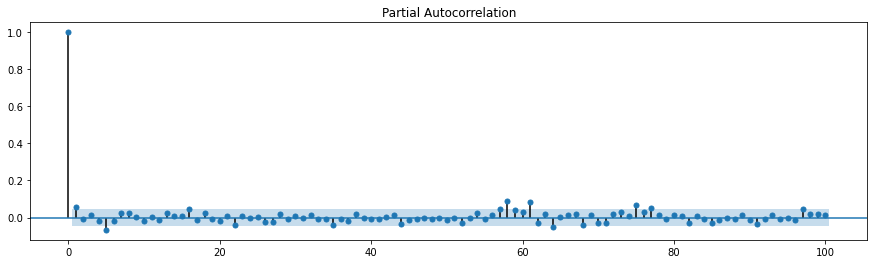

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf

mpl.rcParams['figure.figsize'] = (15,4)
plot_pacf(log_returns.close, lags = 100)
plt.show()

## Fit PDF to the log return data

In [11]:
#from fitter import get_distributions
#get_distributions() # cauchy, norm , 

### Cauchy and Normal Distribution Functions

        sumsquare_error          aic          bic  kl_div
cauchy        81.375403   251.965552 -5391.214314     inf
norm         289.621540  3158.165346 -3158.160322     inf


[]

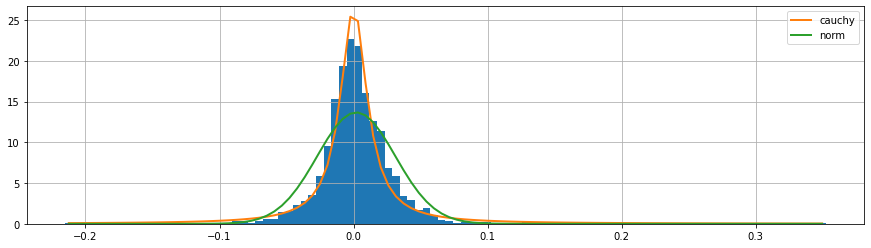

In [12]:
# imports the fitter function and produces estimated fits for our residuals
from fitter import Fitter

f = Fitter(log_returns.dropna())
f.distributions = ['cauchy','norm']
f.fit()
print(f.summary())
plt.plot()

### KDE (Kernel Distribution Estimation) Model Distribution

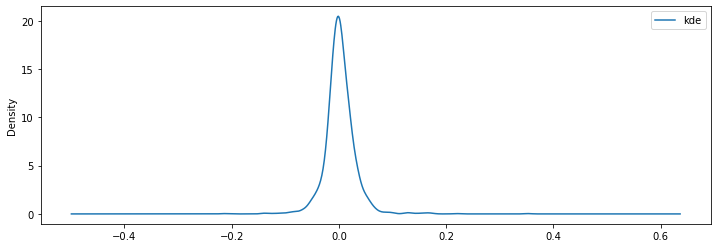

In [13]:
# to suppress warnings
warnings.filterwarnings('ignore')

# sets the plot size to 12x4
mpl.rcParams['figure.figsize'] = (12,4)

# plots the residuals
log_returns.plot(kind = 'kde')
plt.legend(['kde'])
plt.show()

## Estimating Drift & Volatility

In [14]:
u = log_returns.close.mean()
print('Mean : ', u)

Mean :  0.002025826396864904


In [15]:
var = log_returns.close.var()
print('Variance : ', var)

Variance :  0.0008507261209596056


In [16]:
drift = u - 0.5* var
drift

0.001600463336385101

In [17]:
stdev = log_returns.close.std()
stdev

0.029167209687585915

## Setting prediction time period and no. of simulations

In [18]:
t_interval = 365
iterations = 1000

## Populating each step Random Walks defined by the fit Normal Equation

In [19]:
from scipy.stats import norm

daily_returns = np.exp(drift + stdev*norm.ppf(np.random.rand(t_interval, iterations)))

In [20]:
daily_returns

array([[0.97526899, 0.96867981, 1.01288475, ..., 1.03397043, 1.01391711,
        0.99648617],
       [1.06423201, 1.00216603, 1.01262947, ..., 0.96867714, 1.0463205 ,
        1.01071359],
       [0.99237594, 1.0268722 , 0.98497146, ..., 0.97407952, 1.05025854,
        1.04870049],
       ...,
       [1.0243614 , 1.0004146 , 0.97776631, ..., 1.00106922, 0.97768194,
        1.00281773],
       [1.0349186 , 1.02757453, 1.00674609, ..., 1.02662973, 1.07455655,
        1.00289005],
       [1.01241139, 0.97268425, 1.02882793, ..., 0.96346331, 1.03577485,
        1.0576956 ]])

In [21]:
S0 = stock_data.close.iloc[-1]
S0

288.27

In [22]:
price_list = np.zeros_like(daily_returns)

In [23]:
price_list[0] = S0
price_list

array([[288.27, 288.27, 288.27, ..., 288.27, 288.27, 288.27],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

## Unrolling Monte Carlo Simulations 

In [24]:
for t in range(1, t_interval):
    price_list[t] = price_list[t-1]*daily_returns[t]

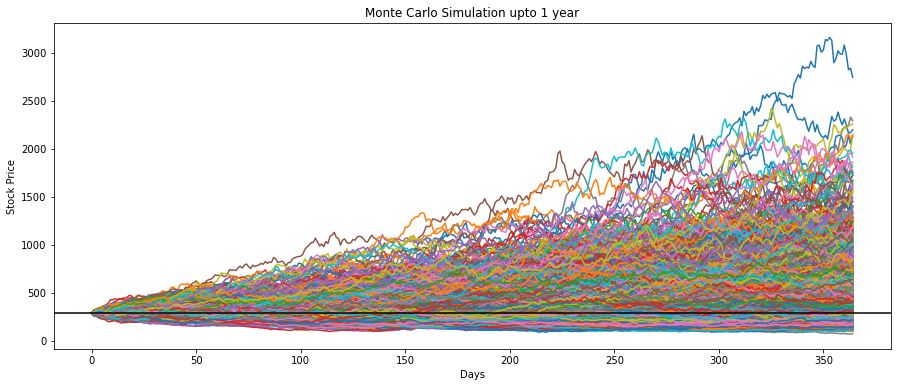

In [25]:
plt.figure(figsize=(15,6))
plt.plot(price_list)
plt.axhline(y=S0, color='black', linestyle='-')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Monte Carlo Simulation upto 1 year')
plt.show()

## Calculating probability of predicted interval

In [26]:
def predicted_interval_probability(threshold, higher, pred):
    denum = float(len(pred))
    closest = lambda index : abs(pred[index] - threshold)
    closest_index = min(range(len(pred)), key=closest) + 1 
    if higher:
        return (denum - closest_index)/denum
    else :
        return closest_index/denum
    
def predicted_interval_probability_range(lower_threshold, higher_threshold, pred):
    denum = float(len(pred))
    closest1 = lambda index : abs(pred[index] - lower_threshold)
    closest2 = lambda index : abs(pred[index] - higher_threshold)
    closest_index1 = min(range(len(pred)), key=closest1) + 1 
    closest_index2 = min(range(len(pred)), key=closest2) + 1 

    return (closest_index2 - closest_index1)/denum

In [27]:
final_price = sorted(price_list[-100])
print('What is the probability of the Close Price to be higher than 566 after a year?')
predicted_interval_probability(566, True, final_price)

What is the probability of the Close Price to be higher than 566 after a year?


0.311

In [28]:
print('What is the probability of the Close Price lies between 400 & 700 after a year?')
predicted_interval_probability_range(400, 700, final_price)

What is the probability of the Close Price lies between 400 & 700 after a year?


0.432